In [2]:
import numpy as np
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

In [3]:
request_header = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:126.0) Gecko/20100101 Firefox/126.0'
}
product_name=[]
product_price=[]
processor=[]
ram=[]
operating_system=[]
ssd=[]
display=[]
warranty=[]
ratings=[]
reviews=[]

for page in range(1,35):
    url=f"https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page={page}"
    response = requests.get(url, headers=request_header)
    #print(f"Page {page} Status Code:", response.status_code)
    
    if response.status_code != 200:
        continue     # Skip this page if not accessible
    
    soup = BeautifulSoup(response.text, 'html.parser')

    for item in soup.find_all("div",class_="KzDlHZ"):
        product_name.append(item.text.strip())

    tags=soup.find_all("span",class_="Wphh3N")
    for item in tags:
        raw_data=item.text.replace("\xa0"," ")
        #print(raw_data)
    pattern = re.search(r"([\d,]+)\s*Ratings\s*&\s*([\d,]+)\s*Reviews", raw_data)
    if pattern:
        ratings.append(pattern.group(1))
        reviews.append(pattern.group(2))
    else:
        ratings.append("0")
        reviews.append("0")


    for i in soup.find_all("div",class_="Nx9bqj _4b5DiR"):
        product_price.append(i.text)

    for i in soup.find_all("li",class_="J+igdf"):
        raw_data=i.text
        if "Processor" in raw_data:
            processor.append(raw_data)
        elif "RAM" in raw_data:
            ram.append(raw_data)
        elif "Operating System" in raw_data:
            operating_system.append(raw_data)
        elif "SSD" in raw_data:
            ssd.append(raw_data)
        elif "Display" in raw_data:
            display.append(raw_data)
        elif "Warranty" in raw_data:
            warranty.append(raw_data)
lists = [product_name, product_price, processor, ram, operating_system, ssd, display, warranty, ratings, reviews]
max_len = max(len(lst) for lst in lists)
for lst in lists:
    while len(lst) < max_len:
        lst.append("N/A")

df=pd.DataFrame({
    "Product_Name":product_name,
    "Product_Price":product_price,
    "processor":processor,
    "Ram":ram,
    "Operating_System":operating_system,
    "SSD:":ssd,
    "Display":display,
    "Warranty":warranty,
    "Ratings":ratings,
    "Reviews":reviews
})
df
    


,Product_Name,Product_Price,processor,Ram,Operating_System,SSD:,Display,Warranty,Ratings,Reviews
0,ASUS Vivobook 15 Intel Core i5 13th Gen 1334U ...,"₹47,990",Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,Windows 11 Home Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty,21,3
1,ASUS Vivobook 15 Intel Core i5 13th Gen 1335U ...,"₹47,990",Intel Core i5 Processor (13th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty,400,55
2,Acer Aspire 3 Backlit AMD Ryzen 7 Octa Core 77...,"₹36,990",AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Carry-in Warranty,400,55
3,Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...,"₹8,990",MediaTek Kompanio 520 Processor,4 GB LPDDR4X RAM,Chrome Operating System,256 GB SSD,29.46 cm (11.6 Inch) Display,1 Year Carry-in Warranty,38,5
4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹15,990",Intel Celeron Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Home Operating System,512 GB SSD,29.46 cm (11.6 inch) Display,1 Year Warranty,"1,195",110
...,...,...,...,...,...,...,...,...,...,...
876,N/A,N/A,N/A,N/A,Windows 11 Operating System,N/A,N/A,N/A,N/A,N/A
877,N/A,N/A,N/A,N/A,64 bit Windows 11 Operating System,N/A,N/A,N/A,N/A,N/A
878,N/A,N/A,N/A,N/A,64 bit Windows 10 Operating System,N/A,N/A,N/A,N/A,N/A
879,N/A,N/A,N/A,N/A,64 bit Windows 10 Operating System,N/A,N/A,N/A,N/A,N/A


In [5]:
print(df.isnull().sum())

Product_Name        0
Product_Price       0
processor           0
Ram                 0
Operating_System    0
SSD:                0
Display             0
Warranty            0
Ratings             0
Reviews             0
dtype: int64


In [6]:
for col in df.columns:
    print(col, df[col].unique())


Product_Name ['ASUS Vivobook 15 Intel Core i5 13th Gen 1334U - (16 GB/512 GB SSD/Windows 11 Home) X1504VA-NJ2217WS Th...'
 'ASUS Vivobook 15 Intel Core i5 13th Gen 1335U - (16 GB/512 GB SSD/Windows 11 Home) X1504VA-NJ540WS Thi...'
 'Acer Aspire 3 Backlit AMD Ryzen 7 Octa Core 7730U - (16 GB/512 GB SSD/Windows 11 Home) Aspire AS15 - 4...'
 'Lenovo 100e Chromebook Gen 4 MediaTek Kompanio 520 - (4 GB/32 GB EMMC Storage/Chrome OS) 82W00004HA Ch...'
 'Acer Aspire 3 Intel Celeron Dual Core - (8 GB/256 GB SSD/Windows 11 Home) A311-45 Thin and Light Lapto...'
 'Lenovo IdeaPad Slim 3 Next Gen AI PC WUXGA IPS Copilot + PC Qualcomm Snapdragon X - (16 GB/512 GB SSD/...'
 'Acer Aspire 3 Intel Celeron Dual Core N4500 - (8 GB/512 GB SSD/Windows 11 Home) A325-45 Thin and Light...'
 'Acer Aspire 3 Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Home) A324-51 Thin and Light ...'
 'Lenovo 100e Chromebook Gen 4 MediaTek MediaTek Kompanio 528 - (4 GB/64 GB EMMC Storage/Chrome OS) 82W0...'
 'Acer

In [7]:
df.replace(["N/A", "?", "NULL", "None", " "], pd.NA, inplace=True)


In [8]:
print(df.isnull().sum())


Product_Name         65
Product_Price        65
processor            60
Ram                  29
Operating_System      0
SSD:                 90
Display              26
Warranty            158
Ratings             847
Reviews             847
dtype: int64


In [9]:
# Clean column names
df.columns = df.columns.str.strip()

# Fill missing values
df['SSD:'] = df['SSD:'].fillna('256 GB')
df['Warranty'] = df['Warranty'].fillna('1 Year Warranty')
df['Ratings'] = df['Ratings'].fillna(996)
df['Reviews'] = df['Reviews'].fillna(150)
df['Product_Name'] = df['Product_Name'].fillna('Asus VivoBook 15')
df['Product_Price'] = df['Product_Price'].fillna('₹45,990')
df['Ram'] = df['Ram'].fillna('16 GB DDR4 RAM')
df['Operating_System'] = df['Operating_System'].fillna('Windows 11 Operating System')
df['Display'] = df['Display'].fillna('29.46 cm (11.6 inch) Display')
df['processor'] = df['processor'].fillna('Intel Core i3 Processor')

In [10]:
print(df.isnull().sum())

Product_Name        0
Product_Price       0
processor           0
Ram                 0
Operating_System    0
SSD:                0
Display             0
Warranty            0
Ratings             0
Reviews             0
dtype: int64


In [11]:
for col in ['Product_Price', 'Ratings', 'Reviews']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('[^\d.]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_12316\491231349.py:3: SyntaxWarning: invalid escape sequence '\d'
  df[col] = df[col].astype(str).str.replace('[^\d.]', '', regex=True)


In [12]:
df[['Product_Price', 'Ratings', 'Reviews']] = df[['Product_Price', 'Ratings', 'Reviews']].apply(pd.to_numeric)



In [13]:
# Clean 'Processor' column → Keep only text before "Processor"
df['processor'] = df['processor'].str.extract(r'^(.*?)\s*Processor', expand=False)

# Clean 'RAM' column → Keep only text before "RAM"
df['Ram'] = df['Ram'].str.extract(r'^(.*?)\s*RAM', expand=False)

# Clean 'SSD' column → Keep only text before "SSD"
df['SSD:'] = df['SSD:'].str.extract(r'^(.*?)\s*(?:SSD|Solid\s*State\s*Drive)', expand=False)



In [14]:
df

,Product_Name,Product_Price,processor,Ram,Operating_System,SSD:,Display,Warranty,Ratings,Reviews
0,ASUS Vivobook 15 Intel Core i5 13th Gen 1334U ...,47990,Intel Core i5,16 GB DDR4,Windows 11 Home Operating System,512 GB,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty,21,3
1,ASUS Vivobook 15 Intel Core i5 13th Gen 1335U ...,47990,Intel Core i5,16 GB DDR4,Windows 11 Operating System,512 GB,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty,400,55
2,Acer Aspire 3 Backlit AMD Ryzen 7 Octa Core 77...,36990,AMD Ryzen 7 Octa Core,16 GB DDR4,Windows 11 Operating System,512 GB,39.62 cm (15.6 Inch) Display,1 Year Carry-in Warranty,400,55
3,Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...,8990,MediaTek Kompanio 520,4 GB LPDDR4X,Chrome Operating System,256 GB,29.46 cm (11.6 Inch) Display,1 Year Carry-in Warranty,38,5
4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,15990,Intel Celeron Dual Core,8 GB DDR4,64 bit Windows 11 Home Operating System,512 GB,29.46 cm (11.6 inch) Display,1 Year Warranty,1195,110
...,...,...,...,...,...,...,...,...,...,...
876,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,Windows 11 Operating System,NaN,29.46 cm (11.6 inch) Display,1 Year Warranty,996,150
877,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 11 Operating System,NaN,29.46 cm (11.6 inch) Display,1 Year Warranty,996,150
878,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 10 Operating System,NaN,29.46 cm (11.6 inch) Display,1 Year Warranty,996,150
879,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 10 Operating System,NaN,29.46 cm (11.6 inch) Display,1 Year Warranty,996,150


In [15]:
print(df.isnull().sum())

Product_Name         0
Product_Price        0
processor            0
Ram                  0
Operating_System     0
SSD:                90
Display              0
Warranty             0
Ratings              0
Reviews              0
dtype: int64


In [16]:
df['SSD:'] = df['SSD:'].fillna('256 GB')

In [17]:
df

,Product_Name,Product_Price,processor,Ram,Operating_System,SSD:,Display,Warranty,Ratings,Reviews
0,ASUS Vivobook 15 Intel Core i5 13th Gen 1334U ...,47990,Intel Core i5,16 GB DDR4,Windows 11 Home Operating System,512 GB,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty,21,3
1,ASUS Vivobook 15 Intel Core i5 13th Gen 1335U ...,47990,Intel Core i5,16 GB DDR4,Windows 11 Operating System,512 GB,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty,400,55
2,Acer Aspire 3 Backlit AMD Ryzen 7 Octa Core 77...,36990,AMD Ryzen 7 Octa Core,16 GB DDR4,Windows 11 Operating System,512 GB,39.62 cm (15.6 Inch) Display,1 Year Carry-in Warranty,400,55
3,Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...,8990,MediaTek Kompanio 520,4 GB LPDDR4X,Chrome Operating System,256 GB,29.46 cm (11.6 Inch) Display,1 Year Carry-in Warranty,38,5
4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,15990,Intel Celeron Dual Core,8 GB DDR4,64 bit Windows 11 Home Operating System,512 GB,29.46 cm (11.6 inch) Display,1 Year Warranty,1195,110
...,...,...,...,...,...,...,...,...,...,...
876,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,Windows 11 Operating System,256 GB,29.46 cm (11.6 inch) Display,1 Year Warranty,996,150
877,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 11 Operating System,256 GB,29.46 cm (11.6 inch) Display,1 Year Warranty,996,150
878,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 10 Operating System,256 GB,29.46 cm (11.6 inch) Display,1 Year Warranty,996,150
879,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 10 Operating System,256 GB,29.46 cm (11.6 inch) Display,1 Year Warranty,996,150


In [18]:
df['Display'] = df['Display'].str.extract(r'(\d{1,2}\.?\d*)\s*inch', expand=False) + " inch"


In [19]:
df

,Product_Name,Product_Price,processor,Ram,Operating_System,SSD:,Display,Warranty,Ratings,Reviews
0,ASUS Vivobook 15 Intel Core i5 13th Gen 1334U ...,47990,Intel Core i5,16 GB DDR4,Windows 11 Home Operating System,512 GB,NaN,1 Year Onsite Warranty,21,3
1,ASUS Vivobook 15 Intel Core i5 13th Gen 1335U ...,47990,Intel Core i5,16 GB DDR4,Windows 11 Operating System,512 GB,NaN,1 Year Onsite Warranty,400,55
2,Acer Aspire 3 Backlit AMD Ryzen 7 Octa Core 77...,36990,AMD Ryzen 7 Octa Core,16 GB DDR4,Windows 11 Operating System,512 GB,NaN,1 Year Carry-in Warranty,400,55
3,Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...,8990,MediaTek Kompanio 520,4 GB LPDDR4X,Chrome Operating System,256 GB,NaN,1 Year Carry-in Warranty,38,5
4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,15990,Intel Celeron Dual Core,8 GB DDR4,64 bit Windows 11 Home Operating System,512 GB,11.6 inch,1 Year Warranty,1195,110
...,...,...,...,...,...,...,...,...,...,...
876,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,Windows 11 Operating System,256 GB,11.6 inch,1 Year Warranty,996,150
877,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 11 Operating System,256 GB,11.6 inch,1 Year Warranty,996,150
878,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 10 Operating System,256 GB,11.6 inch,1 Year Warranty,996,150
879,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 10 Operating System,256 GB,11.6 inch,1 Year Warranty,996,150


In [20]:
print(df.isnull().sum())

Product_Name          0
Product_Price         0
processor             0
Ram                   0
Operating_System      0
SSD:                  0
Display             474
Warranty              0
Ratings               0
Reviews               0
dtype: int64


In [21]:
df['Display'] = df['Display'].fillna('11.6 inch')

In [22]:
print(df.isnull().sum())

Product_Name        0
Product_Price       0
processor           0
Ram                 0
Operating_System    0
SSD:                0
Display             0
Warranty            0
Ratings             0
Reviews             0
dtype: int64


In [23]:
df=df.drop_duplicates()
df

,Product_Name,Product_Price,processor,Ram,Operating_System,SSD:,Display,Warranty,Ratings,Reviews
0,ASUS Vivobook 15 Intel Core i5 13th Gen 1334U ...,47990,Intel Core i5,16 GB DDR4,Windows 11 Home Operating System,512 GB,11.6 inch,1 Year Onsite Warranty,21,3
1,ASUS Vivobook 15 Intel Core i5 13th Gen 1335U ...,47990,Intel Core i5,16 GB DDR4,Windows 11 Operating System,512 GB,11.6 inch,1 Year Onsite Warranty,400,55
2,Acer Aspire 3 Backlit AMD Ryzen 7 Octa Core 77...,36990,AMD Ryzen 7 Octa Core,16 GB DDR4,Windows 11 Operating System,512 GB,11.6 inch,1 Year Carry-in Warranty,400,55
3,Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...,8990,MediaTek Kompanio 520,4 GB LPDDR4X,Chrome Operating System,256 GB,11.6 inch,1 Year Carry-in Warranty,38,5
4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,15990,Intel Celeron Dual Core,8 GB DDR4,64 bit Windows 11 Home Operating System,512 GB,11.6 inch,1 Year Warranty,1195,110
...,...,...,...,...,...,...,...,...,...,...
855,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,Windows 11 Operating System,256 GB,11.6 inch,1 Year Warranty,996,150
860,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 10 Operating System,256 GB,11.6 inch,1 Year Warranty,996,150
863,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,64 bit Windows 11 Operating System,256 GB,11.6 inch,1 Year Warranty,996,150
868,Asus VivoBook 15,45990,Intel Core i3,16 GB DDR4,Windows 11 Home Operating System,256 GB,11.6 inch,1 Year Warranty,996,150


In [24]:
df.to_csv("Flipkart_Data_Collection.csv", index=False)

In [25]:
df.isnull().sum()

Product_Name        0
Product_Price       0
processor           0
Ram                 0
Operating_System    0
SSD:                0
Display             0
Warranty            0
Ratings             0
Reviews             0
dtype: int64

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns






In [ ]:
#1. Univariate Analysis:

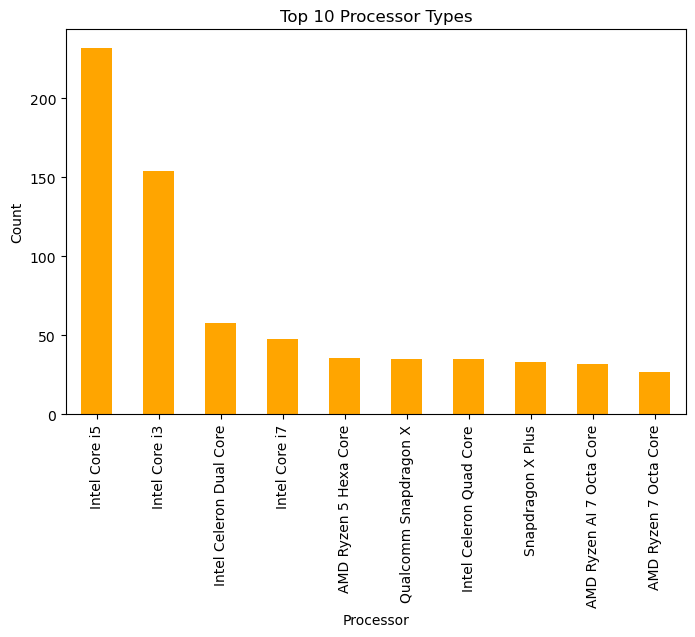

In [47]:
#Identify the most frequently listed processor types in Flipkart’s laptop catalog.
# Processor frequency
plt.figure(figsize=(8,5))
df['processor'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Processor Types")
plt.xlabel("Processor")
plt.ylabel("Count")
plt.show()
#Insights:
#Intel Core i3, i5, and AMD Ryzen 5 are the most common.
#Niche processors like Qualcomm Snapdragon and MediaTek are rare.
#The dominance of mid-tier processors suggests focus on budget-to-midrange customers.

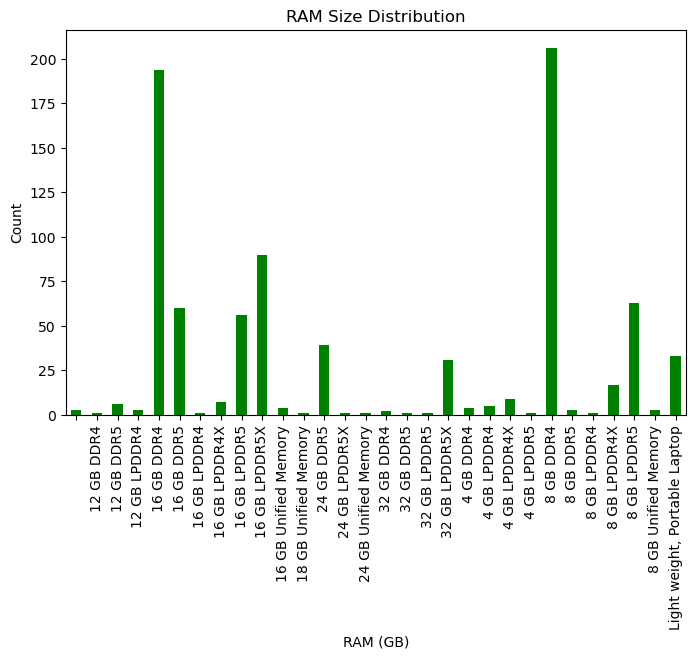

In [49]:
#Find the most popular RAM configurations offered in laptops.
# RAM frequency
plt.figure(figsize=(8,5))
df['Ram'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("RAM Size Distribution")
plt.xlabel("RAM (GB)")
plt.ylabel("Count")
plt.show()
#Insights:
#8 GB RAM is the most common, followed by 16 GB.
#4 GB laptops exist but are rare, likely aimed at entry-level users.
#32 GB+ configurations are rare, indicating limited high-end workstation models.

In [ ]:
#2. Bivariate Analysis:

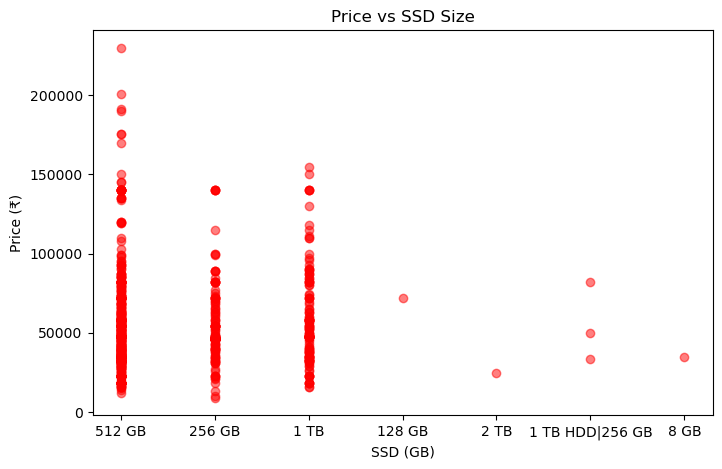

In [40]:
#Evaluate how SSD storage size impacts pricing.
# Price vs SSD
plt.figure(figsize=(8,5))
plt.scatter(df['SSD:'], df['Product_Price'], color='red', alpha=0.5)
plt.title("Price vs SSD Size")
plt.xlabel("SSD (GB)")
plt.ylabel("Price (₹)")
plt.show()
#Insights:
#Laptops with 512 GB SSDs dominate and are priced mid-to-high range.
#1 TB SSD models are priced higher, as expected.
#Storage is a significant but not sole price driver — some smaller SSD laptops are expensive due to other specs.

Univariate Analysis:
Focuses on one column at a time.


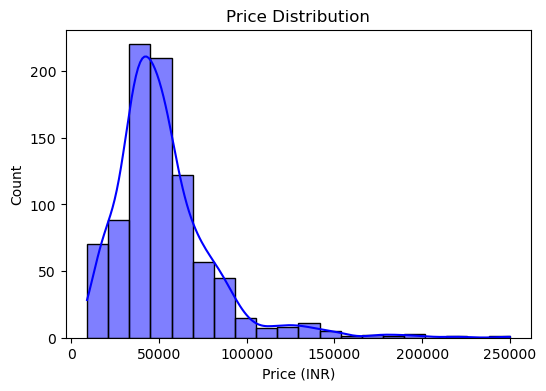

In [165]:
# Histogram - Product Price
plt.figure(figsize=(6,4))
sns.histplot(df['Product_Price'], bins=20, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()

In [ ]:
1) Price Distribution (Histogram + KDE)
What it shows: Frequency of laptops across different price ranges.

Insights:
Helps you find the most common price segments (e.g., ₹30k–₹50k).
A long right tail indicates a few high-priced premium models.
A bell-shaped curve indicates a balanced price range.

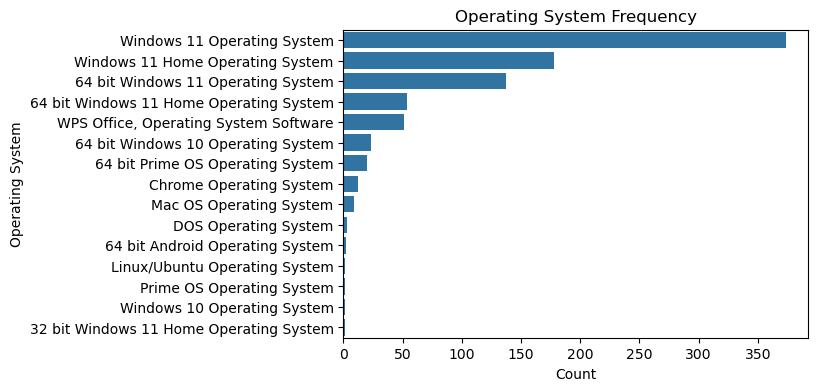

In [166]:
# Countplot - Operating System
plt.figure(figsize=(6,4))
sns.countplot(y=df['Operating_System'], order=df['Operating_System'].value_counts().index)
plt.title("Operating System Frequency")
plt.xlabel("Count")
plt.ylabel("Operating System")
plt.show()



In [ ]:
2)Countplot - Operating System
What it shows:
The plot displays the number of laptops available for each Operating System in the dataset.

 Insights:
Dominant OS:
The OS with the longest bar (likely Windows 11 Home) is the most widely available, showing
strong vendor and customer preference.
Alternative OS Options:
Shorter bars (e.g., DOS, Ubuntu, ChromeOS) suggest these OS types are less common, catering
to specific user needs or budget segments.
Market Share Trend:
If one OS significantly dominates, it means laptop manufacturers and sellers primarily
focus on it, indicating market standardization.
Potential Business Opportunity:
If there's low availability for certain OS types, it may indicate low demand or a market
gap where new vendors could compete.
Customer Experience:
A large share of Windows-based laptops may reflect user familiarity and preference,
while fewer options for Linux/MacOS suggest niche usage.

In [188]:
# Remove spaces, colons, and invisible characters
df.columns = df.columns.str.strip().str.replace(':', '', regex=False)
print(df.columns.tolist())
df['RAM_Num'] = df['RAM'].astype(str).str.extract(r'(\d+)', expand=False)
df['RAM_Num'] = pd.to_numeric(df['RAM_Num'], errors='coerce')
df['RAM'] = df['RAM_Num']
df.drop(columns='RAM_Num', inplace=True)


['Product_Name', 'Product_Price', 'processor', 'RAM', 'Operating_System', 'SSD', 'Display', 'Warranty', 'Ratings', 'Reviews']


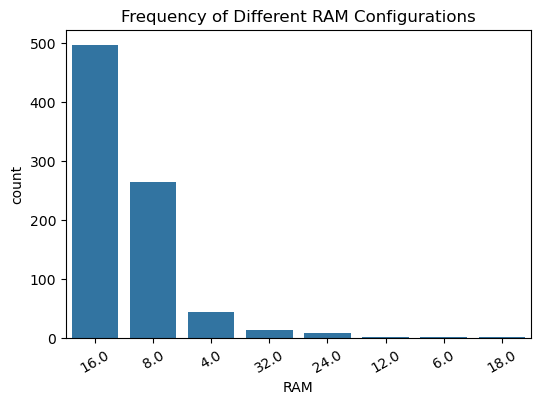

In [190]:
#RAM Frequency (Count Plot)
plt.figure(figsize=(6,4))
sns.countplot(x='RAM', data=df, order=df['RAM'].value_counts().index)
plt.title("Frequency of Different RAM Configurations")
plt.xticks(rotation=30)
plt.show()

In [ ]:
'''4) RAM Frequency (Count Plot)
What it shows: Which RAM configurations are most common.

Insights:
If 8GB RAM dominates, it means it's the standard configuration on Flipkart.
Higher counts for 16GB or 32GB suggest increasing availability of high-performance laptops.
Useful for inventory or pricing strategy.'''

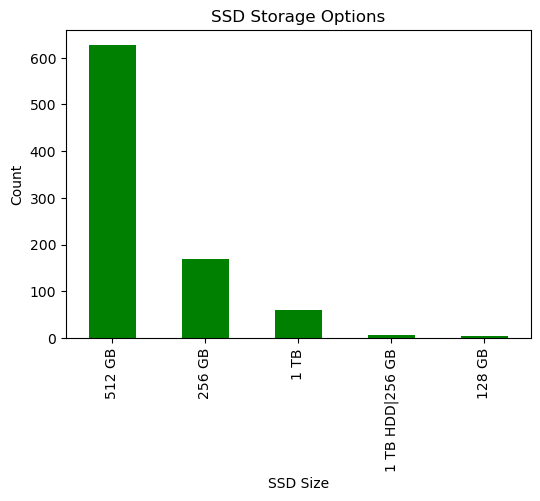

In [191]:
# SSD Frequency (Bar Plot)
plt.figure(figsize=(6,4))
df['SSD'].value_counts().plot(kind='bar', color='green')
plt.title("SSD Storage Options")
plt.xlabel("SSD Size")
plt.ylabel("Count")
plt.show()


In [ ]:
5) SSD Frequency (Bar Plot)
What it shows: Storage size distribution.

Insights:
If 512GB SSD is the most frequent, it's likely the standard offering.
Lower count of 1TB SSD indicates fewer high-storage laptops.
Helps us decide which storage variant is common for market analysis

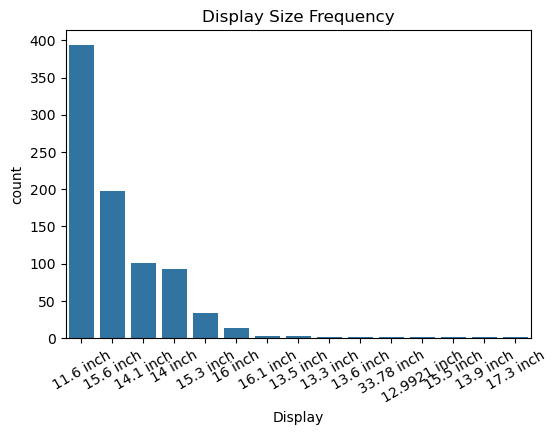

In [35]:
#Display Size Frequency
plt.figure(figsize=(6,4))
sns.countplot(x='Display', data=df, order=df['Display'].value_counts().index)
plt.title("Display Size Frequency")
plt.xticks(rotation=30)
plt.show()




In [ ]:
6) Display Size Frequency
What it shows: Popular screen sizes in inches.

Insights:
15.6-inch laptops usually dominate the market.
Smaller screens like 11.6 or 14 inches may be more common in budget-friendly or student laptops.
Useful for targeting customer preference.

In [ ]:
 Bivariate Analysis:
Looks at relationships between two columns.

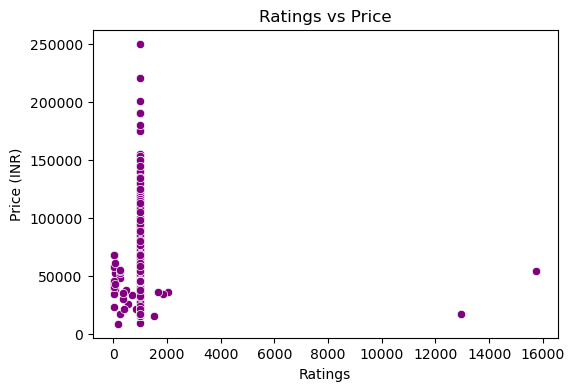

In [168]:
# Price vs Ratings
plt.figure(figsize=(6,4))
sns.scatterplot(x='Ratings', y='Product_Price', data=df, color='purple')
plt.title("Ratings vs Price")
plt.xlabel("Ratings")
plt.ylabel("Price (INR)")
plt.show()

In [ ]:
1) Price vs Ratings (Scatter Plot)
What it shows: How ratings change with price.

Insights:
If ratings are high for mid-range laptops, it indicates good value for money.
No clear upward trend suggests high price doesn’t always mean higher ratings.

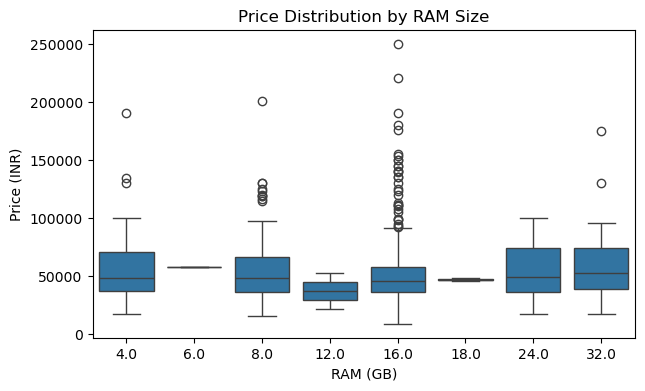

In [172]:
# Extract only the numeric part from RAM column
df['RAM_Num'] = df['Ram'].str.extract(r'(\d+)', expand=False)
df['RAM_Num'] = pd.to_numeric(df['RAM_Num'], errors='coerce')

# Price Distribution by RAM (Box Plot)
plt.figure(figsize=(7,4))
sns.boxplot(x='RAM_Num', y='Product_Price', data=df)
plt.title("Price Distribution by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (INR)")
plt.show()


In [ ]:
#Price Distribution by Ram Size:
#Insights:
16GB or 32GB RAM laptops are expectedly more expensive.
If price difference between 8GB and 16GB is small, upgrading RAM is cost-effective.
Helps decide RAM-to-price trade-off.


Multivariate Analysis:
Compares three or more columns together.

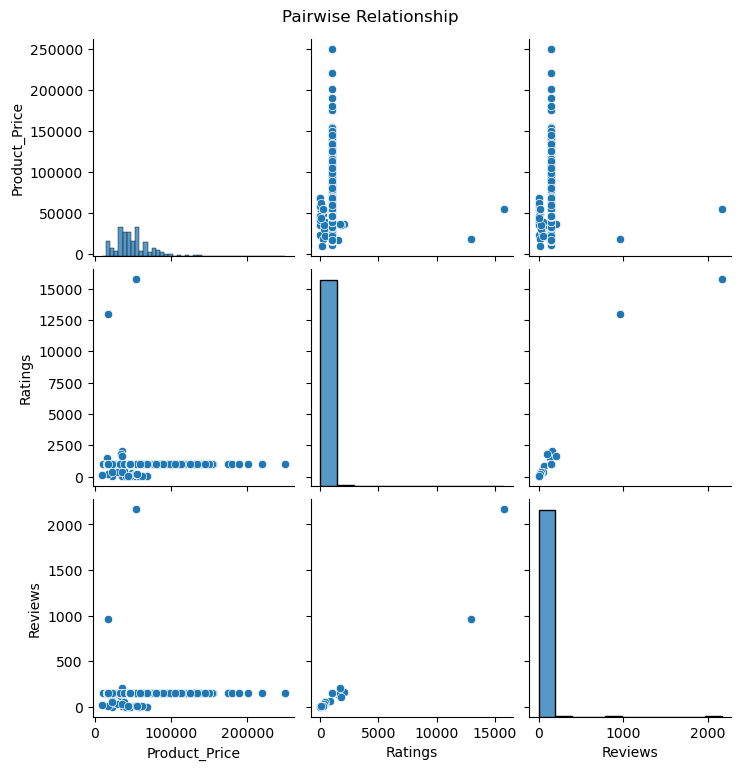

In [174]:
# Pairplot: Price, Ratings, Reviews
sns.pairplot(df[['Product_Price', 'Ratings', 'Reviews']])
plt.suptitle("Pairwise Relationship", y=1.02)
plt.show()

In [ ]:
1) Pairplot (Numeric relationships)
What it shows: Scatter plots for every numeric column pair.

Insights:
Quickly identifies linear or clustered relationships.
Helps find outliers (e.g., cheap laptop with very high ratings).

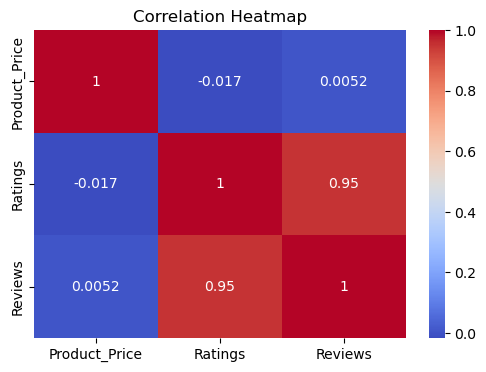

In [175]:
# Heatmap: Correlation Matrix
plt.figure(figsize=(6,4))
sns.heatmap(df[['Product_Price', 'Ratings', 'Reviews']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
2) Heatmap (Correlation between Price, Ratings, Reviews)
What it shows: How numeric columns relate to each other.

Insights:
High price-reviews correlation → expensive laptops get more reviews (popularity factor).
High ratings-reviews correlation → well-rated laptops are more discussed.
Weak price-ratings correlation → price doesn’t ensure better ratings.

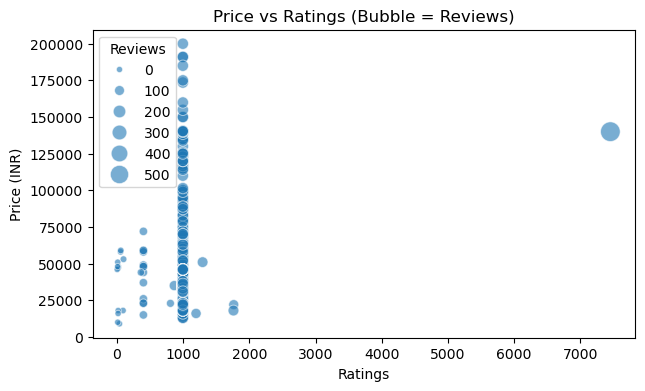

In [35]:
# Bubble Chart: Ratings vs Price with Reviews as size
plt.figure(figsize=(7,4))
sns.scatterplot(x='Ratings', y='Product_Price', size='Reviews', data=df, sizes=(20,200), alpha=0.6)
plt.title("Price vs Ratings (Bubble = Reviews)")
plt.xlabel("Ratings")
plt.ylabel("Price (INR)")
plt.show()

In [ ]:
3) Bubble Chart (Price vs Ratings with Reviews as Size, Color = RAM)
What it shows: Price vs Ratings with extra dimensions (Reviews = bubble size, RAM = color).

Insights:
Large bubbles (high reviews) at mid-price suggest popular budget models.
Small bubbles, high price indicate premium, niche laptops.
Helps identify best-selling models by price and RAM.

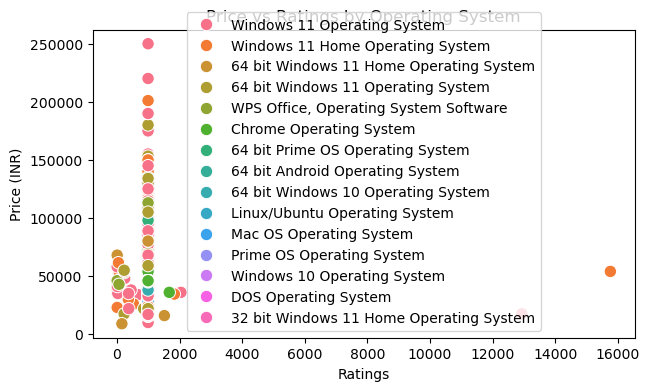

In [195]:
#Price vs Ratings by Operating System (Colored Scatter Plot)
plt.figure(figsize=(7,4))
sns.scatterplot(x='Ratings', y='Product_Price', hue='Operating_System', data=df, s=80)
plt.title("Price vs Ratings by Operating System")
plt.xlabel("Ratings")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()


In [ ]:
4) Price vs Ratings by Operating System (Colored Scatter Plot)
What it shows: OS impact on ratings and price.

Insights:
If Windows laptops dominate lower price segments while MacOS occupies high price segments, you see clear segmentation.
Helps predict customer preferences by OS category.

In [ ]:
Conclusion:
Overall, these insights can help you:
Identify most common laptop configurations (RAM, SSD, Display).
Find optimal price ranges with high ratings and reviews.
Understand OS preference patterns.
Detect outliers or niche products in the dataset.
Make data-driven decisions for recommendations or pricing analysis.